# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
from sklearn.cluster import	KMeans
from scipy.spatial.distance import cdist

# Loading the dataset

In [3]:
crime_data = pd.read_csv("crime_data.csv")
crime_data.describe()
c_data = crime_data.drop(["Unnamed: 0"], axis = 1)

# Normalization function

In [4]:
def norm_func(i):
    x = (i - i.min())	/ (i.max() - i.min())
    return (x)

In [5]:
df_norm = norm_func(c_data)
df_norm.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.360000
std,0.262380,0.285403,0.245335,0.242025
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.200904
50%,0.388554,0.390411,0.576271,0.330749
75%,0.629518,0.698630,0.775424,0.487726
max,1.000000,1.000000,1.000000,1.000000


In [6]:
TWSS = []
k = list(range(2, 7))

In [7]:
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)

In [8]:
TWSS

[6.596893867946199,
 5.010878493006419,
 3.683456153585915,
 3.1842618139677223,
 2.821690217146165]

# Scree Plot or Elbow curve

Text(0, 0.5, 'total_within_SS')

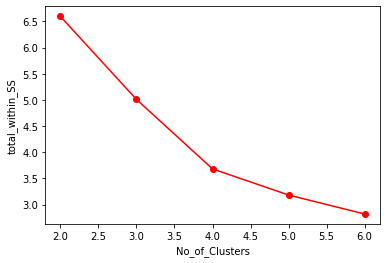

In [9]:
plt.plot(k, TWSS, 'ro-')
plt.xlabel("No_of_Clusters")
plt.ylabel("total_within_SS")

## Threfore, optimal number of clusters = 4

In [10]:
model = KMeans(n_clusters = 4)

In [11]:
model.fit(df_norm)

KMeans(n_clusters=4)

# getting the labels of clusters assigned to each row 

In [12]:
model.labels_ 

array([0, 2, 2, 0, 2, 2, 3, 3, 2, 0, 3, 1, 2, 3, 1, 3, 1, 0, 1, 2, 3, 2,
       1, 0, 2, 1, 1, 2, 1, 3, 2, 2, 0, 1, 3, 3, 3, 3, 3, 0, 1, 0, 2, 3,
       1, 3, 3, 1, 1, 3])

# converting numpy array into pandas series object 

In [13]:
mb = pd.Series(model.labels_)

# creating a  new column and assigning it to new column 

In [14]:
c_data['clust'] = mb 

In [16]:
c_data.head()

,Murder,Assault,UrbanPop,Rape,clust
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,2


In [17]:
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [18]:
c_data = c_data.iloc[:,[4,0,1,2,3]]
c_data.head()

,clust,Murder,Assault,UrbanPop,Rape
0,0,13.2,236,58,21.2
1,2,10.0,263,48,44.5
2,2,8.1,294,80,31.0
3,0,8.8,190,50,19.5
4,2,9.0,276,91,40.6


In [19]:
c_data.iloc[:, 1:5].groupby(c_data.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,13.937500,243.625000,53.750000,21.412500
1,3.600000,78.538462,52.076923,12.176923
2,10.815385,257.384615,76.000000,33.192308
3,5.656250,138.875000,73.875000,18.781250


In [20]:
c_data.to_csv("Kmeans_crime.csv", encoding = "utf-8")

In [21]:
import os
os.getcwd()

'C:\\Users\\DELL\\K Means'